In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2012-01-01'
end = '2022-12-21'

ticker = 'GOOG'

raw_data = yf.download(ticker , start , end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
raw_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [8]:
data = raw_data.copy()

Text(0.5, 1.0, 'Google Closing Price')

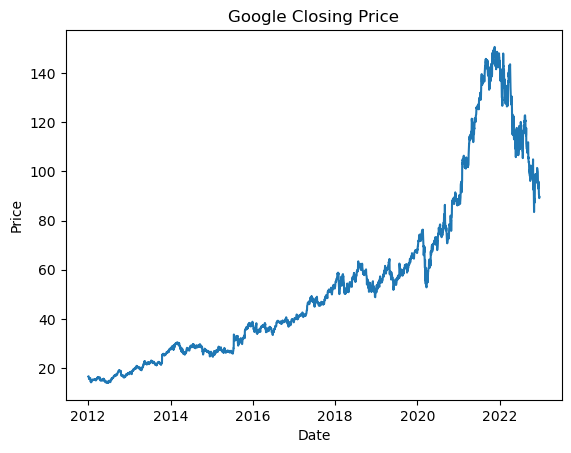

In [9]:
plt.plot(data['Close'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Closing Price")

In [10]:
data.reset_index(inplace=True)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [12]:
ma_10_days = data.Close.rolling(10).mean()

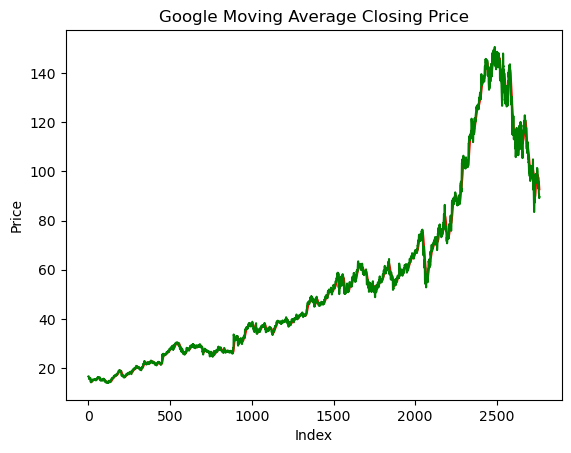

In [13]:
plt.plot(ma_10_days, 'r')
plt.plot(data.Close, 'g')
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Google Moving Average Closing Price")
plt.show()

In [14]:
ma_100_days = data.Close.rolling(100).mean()

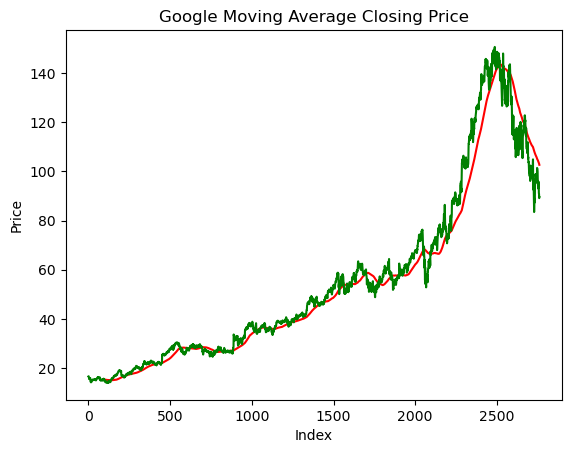

In [15]:
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Google Moving Average Closing Price")
plt.show()

In [16]:
data.dropna(inplace=True)

In [22]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [23]:
data_train

,Close
0,16.573130
1,16.644611
2,16.413727
3,16.189817
4,15.503389
...,...
2203,74.301003
2204,72.671997
2205,73.014503
2206,74.296501


In [24]:
data_test

,Close
2208,78.457497
2209,78.584000
2210,78.403999
2211,77.956497
2212,78.650497
...,...
2756,95.309998
2757,91.199997
2758,90.860001
2759,89.150002


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
data_train_scaled = scaler.fit_transform(data_train)

In [27]:
x = []
y = []

for i in range(100 , data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100 : i])
    y.append(data_train_scaled[i,0])

In [36]:
x, y = np.array(x), np.array(y)

In [38]:
x.shape

(2108, 100, 1)

In [39]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [42]:
model = Sequential()
model.add(LSTM(units=50 , activation='relu', return_sequences=True,
              input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60 , activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80 , activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [47]:
model.compile(optimizer='adam' , loss='mean_squared_error',metrics=['accuracy'] )

In [49]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [50]:
history = model.fit(x, y, epochs=50 , batch_size=32, verbose=1, callbacks=callback)

Epoch 1/50

66/66 [==============================] - 54s 415ms/step - loss: 0.0609 - accuracy: 0.0000e+00
Epoch 2/50
66/66 [==============================] - 27s 413ms/step - loss: 0.0441 - accuracy: 0.0000e+00
Epoch 3/50
66/66 [==============================] - 27s 414ms/step - loss: 0.0403 - accuracy: 0.0000e+00
Epoch 4/50
66/66 [==============================] - 27s 414ms/step - loss: 0.0419 - accuracy: 0.0000e+00
Epoch 5/50
66/66 [==============================] - 27s 415ms/step - loss: 0.0369 - accuracy: 0.0000e+00
Epoch 6/50
66/66 [==============================] - 27s 413ms/step - loss: 0.0379 - accuracy: 0.0000e+00
Epoch 7/50
66/66 [==============================] - 27s 414ms/step - loss: 0.0374 - accuracy: 0.0000e+00
Epoch 8/50
66/66 [==============================] - 27s 413ms/step - loss: 0.0369 - accuracy: 0.0000e+00
Epoch 9/50
66/66 [==============================] - 27s 415ms/step - loss: 0.0348 - accuracy: 0.0000e+00
Epoch 10/50
66/66 [==============================] - 2

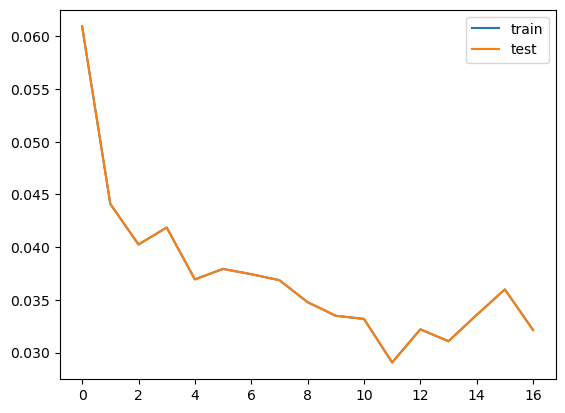

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['loss'], label='test')
plt.legend()
plt.show()


In [53]:
pas_100_days = data_train.tail(100)

In [54]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [55]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [56]:
data_test_scaled = scaler.fit_transform(data_test)

In [57]:
x = []
y = []

for i in range(100 , data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100 : i])
    y.append(data_test_scaled[i,0])
    
x, y = np.array(x), np.array(y)

In [58]:
y_predict = model.predict(x)

18/18 [==============================] - 5s 131ms/step


In [59]:
y_predict

array([[-1.1648132 ],
       [-1.1622826 ],
       [-1.1572471 ],
       [-1.1488138 ],
       [-1.1372267 ],
       [-1.1234595 ],
       [-1.109317  ],
       [-1.0963078 ],
       [-1.085049  ],
       [-1.0753701 ],
       [-1.0664039 ],
       [-1.0579817 ],
       [-1.0501856 ],
       [-1.0442867 ],
       [-1.0407977 ],
       [-1.0389149 ],
       [-1.0373266 ],
       [-1.0344268 ],
       [-1.027467  ],
       [-1.0142306 ],
       [-0.99428046],
       [-0.96860605],
       [-0.9393957 ],
       [-0.9089869 ],
       [-0.8796115 ],
       [-0.85299605],
       [-0.8301589 ],
       [-0.81186634],
       [-0.7986975 ],
       [-0.7905197 ],
       [-0.7870567 ],
       [-0.7878572 ],
       [-0.7916237 ],
       [-0.79667854],
       [-0.80099314],
       [-0.8034568 ],
       [-0.8030917 ],
       [-0.798952  ],
       [-0.7908395 ],
       [-0.77922076],
       [-0.76519   ],
       [-0.7501415 ],
       [-0.73592645],
       [-0.72429657],
       [-0.71638644],
       [-0

In [70]:
y_predict.shape

(553, 1)

In [71]:
y.shape

(553,)

In [77]:
y = y.reshape((553, 1))

In [78]:
y.shape

(553, 1)

In [79]:
unscaled_y_pred = scaler.inverse_transform(y_predict)
unscaled_y = scaler.inverse_transform(y)

In [80]:
unscaled_y

array([[ 78.45749664],
       [ 78.58399963],
       [ 78.40399933],
       [ 77.95649719],
       [ 78.65049744],
       [ 76.73049927],
       [ 77.79650116],
       [ 79.66549683],
       [ 80.76650238],
       [ 82.05000305],
       [ 79.52249908],
       [ 80.21299744],
       [ 75.83100128],
       [ 78.36199951],
       [ 81.05049896],
       [ 81.30149841],
       [ 82.51049805],
       [ 87.45649719],
       [ 88.16850281],
       [ 88.08750153],
       [ 88.15000153],
       [ 87.01950073],
       [ 87.63549805],
       [ 87.49199677],
       [ 88.85099792],
       [ 89.06900024],
       [ 88.50749969],
       [ 87.33899689],
       [ 88.19599915],
       [ 87.10949707],
       [ 86.74299622],
       [ 88.44400024],
       [ 88.57150269],
       [ 89.65950012],
       [ 88.03700256],
       [ 89.90499878],
       [ 91.39749908],
       [ 91.33850098],
       [ 91.39949799],
       [ 90.97399902],
       [ 90.92749786],
       [ 89.20649719],
       [ 88.76650238],
       [ 89

In [84]:
unscaled_y_pred

array([[ 82.82669 ],
       [ 82.887215],
       [ 83.00765 ],
       [ 83.20936 ],
       [ 83.486496],
       [ 83.81577 ],
       [ 84.15403 ],
       [ 84.46518 ],
       [ 84.73446 ],
       [ 84.96596 ],
       [ 85.18041 ],
       [ 85.38185 ],
       [ 85.56831 ],
       [ 85.709404],
       [ 85.79285 ],
       [ 85.83788 ],
       [ 85.87587 ],
       [ 85.94523 ],
       [ 86.11169 ],
       [ 86.428276],
       [ 86.90543 ],
       [ 87.51951 ],
       [ 88.21815 ],
       [ 88.94546 ],
       [ 89.64805 ],
       [ 90.28463 ],
       [ 90.83084 ],
       [ 91.26836 ],
       [ 91.58333 ],
       [ 91.778915],
       [ 91.86175 ],
       [ 91.8426  ],
       [ 91.75251 ],
       [ 91.631615],
       [ 91.52842 ],
       [ 91.46949 ],
       [ 91.478226],
       [ 91.57724 ],
       [ 91.77127 ],
       [ 92.049164],
       [ 92.38474 ],
       [ 92.74467 ],
       [ 93.08466 ],
       [ 93.36282 ],
       [ 93.55201 ],
       [ 93.633736],
       [ 93.60698 ],
       [ 93.4

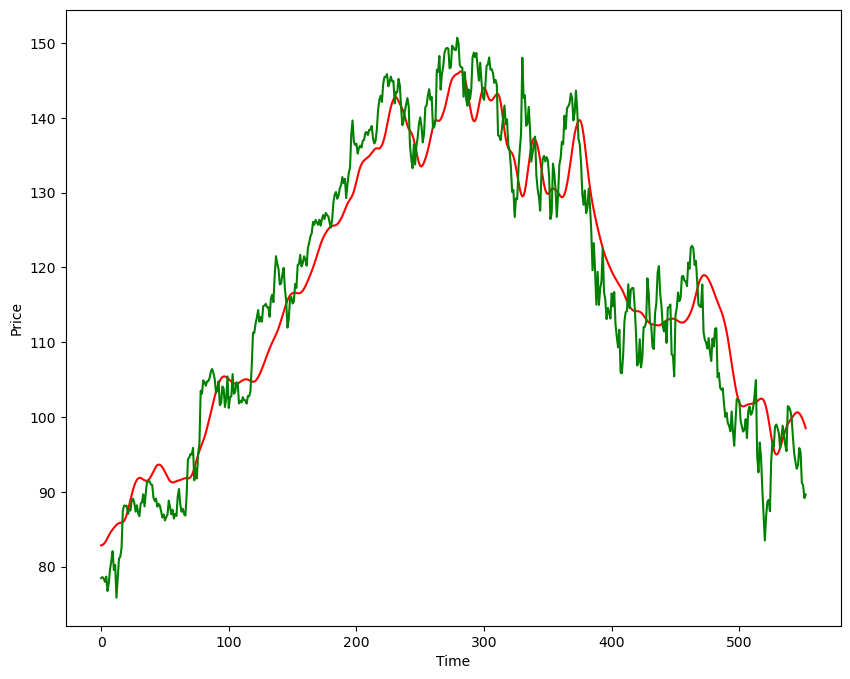

In [85]:
plt.figure(figsize=(10,8))
plt.plot(unscaled_y_pred ,'r' , label='Predictions Price' )
plt.plot(unscaled_y ,'g' , label='Original Price' )
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [83]:
model.save('LSTM_Model.keras')